Bom dia, boa tarde, boa noite a todos que chegaram ao meu projeto.
A proposta desse projeto eu retirei de uma das competições do kaggle sendo ele uma competição classica quando se trata de machine learning, a minha ideia de tentar alcançar uma precisão de mais de 80% para prever quais passageiros sobreviveriam ao icidente.
Esse é o link da competição a quem possa interresar.
https://www.kaggle.com/competitions/titanic

Importando as bibliotecas que vou precisar


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,median_absolute_error,accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Importando a base de dados de treino.

In [2]:
dados = pd.read_csv('train.csv', sep=',')

Começando a análise exploratória

In [3]:
# Dando inicio a analise inical gera dos meus dados
display(dados.head())

# Verificando as cincos primeiras linhas dos meus dados
print('__'*50)
print(dados.shape)

# Verificando quantas linhas e colunas meus dados possuem
print('__'*50)
print(dados.info())

# Verificando os tipos dos meus dados
print('__'*50)
display(dados.describe())

# Verificando quantos valores nulos eu tenho
print('__'*50)
print(dados.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


____________________________________________________________________________________________________
(891, 12)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
___________________________

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


____________________________________________________________________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Como a coluna cabin possui muitos valores nulos vou está removendo ela
dados = dados.drop('Cabin',axis=1)

Por achar que a idade pode ser um fator interessante vou preencher os valores nulos da coluna idade com a mediana da idade de todos os passageiros sendo ela 28 anos.

In [5]:
# Preenchendo os valores nulos da coluna idade
dados['Age'].fillna(28,inplace=True)

In [6]:
# Estou verificando novamente quantos valores nulos minha base possue após um tratamento inicial
print(dados.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [7]:
# Vou analisar todas as colunas do tipo object
colunas = dados.select_dtypes(include=['object'])
colunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Embarked  889 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


Como acho interessante em saber o sexo de quem poderia sobreviver vou criar uma coluna is female e preenche-la com 0 se for homem e 1 caso seja mulher, logo após isso vou deletar a coluna sex do tipo object

In [8]:
dados['IsFemale'] = dados['Sex'].apply(lambda x: 1 if x =='female' else 0)

Estou assumindo que a coluna embarked pode ser importante por assumir que o embarque dos passageiros pode ser um dado importante a ser levado em consideração vou criar a coluna tipo de embarque para análise.

In [9]:
# Criando a coluna Embarked type
dick_embark = {'S':0 , 'C': 1, 'Q':2}
dados['Embarked Type'] = dados['Embarked'].map(dick_embark)



In [10]:
# Verificando novamente os valores nulos da minha base
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
IsFemale         0
Embarked Type    2
dtype: int64

Como a coluna Embarked tem dois valores nulos a coluna Embarked Type também tera dois valores nulos seguindo a logica que eu usei para criar a coluna os dois valores nulos eu vou preenche-los com o valor de 3.

In [11]:
dados['Embarked Type'].fillna(3,inplace=True)

Após o tratamento agora posso eliminar as outras colunas do tipo object por não achar elas relevantes para a minha analise.

In [12]:
dados = dados.drop(['Name','Sex','Ticket','Embarked'],axis=1)

Com isso finalizo a minha exploração e tratamento agora vou replicar isso para a minha base de teste e após isso vou iniciar a montagem dos meus modelos.

In [13]:
dados_teste = pd.read_csv('/content/test.csv', sep=',')


In [14]:
dados_teste['IsFemale'] = dados_teste['Sex'].apply(lambda x: 1 if x =='female' else 0)
dados_teste = dados_teste.drop('Sex',axis=1)
dados_teste = dados_teste.drop('Cabin',axis=1)
dados_teste['Age'].fillna(30,inplace=True)
dick_embark = {'S':0 , 'C': 1, 'Q':2}
dados_teste['Embarked Type'] = dados_teste['Embarked'].map(dick_embark)
dados_teste['Embarked Type'].fillna(3,inplace=True)

In [15]:
# Verificando os valores nulos da minha base de teste
dados_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
IsFemale         0
Embarked Type    0
dtype: int64

In [16]:
# Verificando os tipos dos meus dados de teste
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Age            418 non-null    float64
 4   SibSp          418 non-null    int64  
 5   Parch          418 non-null    int64  
 6   Ticket         418 non-null    object 
 7   Fare           417 non-null    float64
 8   Embarked       418 non-null    object 
 9   IsFemale       418 non-null    int64  
 10  Embarked Type  418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


Como meus dados de teste possuim um valor nulo na coluna fare vou preencher esse falor com a mediana da coluna que é 14.45 como a coluna fare é do tipo int64 vou preencher o valor nulo com 14 desconsiderando as casas decimais.

In [17]:
dados_teste['Fare'].fillna(14,inplace=True)

In [18]:
dados_teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsFemale,Embarked Type
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.216507,0.447368,0.392344,35.575449,0.363636,0.464115
std,120.810458,0.841838,12.635016,0.896760,0.981429,55.850519,0.481622,0.685516
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,2.000000


In [19]:
# Após isso eu posso eliminar as colunas do tipo object da minha base de teste
dados_teste = dados_teste.drop(['Name','Ticket','Embarked'],axis=1)
display(dados_teste)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsFemale,Embarked Type
0,892,3,34.5,0,0,7.8292,0,2
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,2
3,895,3,27.0,0,0,8.6625,0,0
4,896,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.0,0,0,8.0500,0,0
414,1306,1,39.0,0,0,108.9000,1,1
415,1307,3,38.5,0,0,7.2500,0,0
416,1308,3,30.0,0,0,8.0500,0,0


Com isso posso montar meus modelos agora, decidi por usar alguns algoritmos de classificação como floresta aleatoria, naive bayes e outros para comparar a precisão entre eles.

In [20]:
# Agora vou dividir minha base de treino
X = dados.drop('Survived',axis=1)
y = dados.Survived



In [21]:
# Dividindo minha base de treino e teste e montando
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,)
model_forest = RandomForestClassifier(n_estimators=150, criterion='gini')
gnb = GaussianNB()
linear_model = LinearRegression()


In [22]:
# fazendo o fit dos modelos
model_forest.fit(X_train, y_train)
gnb.fit(X_train, y_train)
linear_model.fit(X_train,y_train)


LinearRegression()

In [23]:
# Fazendo a previsão da floreta aleatoria
y_forest = model_forest.predict(X_test)
# print(y_forest)

In [24]:
# Fazendo a previsão da Classificação
y_gaussian = gnb.predict(X_test)
# print(y_naive)


In [25]:
y_linear=linear_model.predict(X_test)
# print(y_linear)

Verificando o score dos meus modelos

In [26]:
# Criando as metricas de precição dos meus modelos
forest_score = classification_report(y_test,y_forest,output_dict=False)
gaussian_score = classification_report(y_test,y_gaussian,output_dict=False)
linear_score = classification_report(y_test,y_forest,output_dict=False)

print('Relatorio floresta aleatoria')
print(forest_score)
print('_'*50)

print('Relatorio Naive Bayes')
print(gaussian_score)
print('_'*50)

print('Relatorio Regressão Linear ')
print(linear_score)

Relatorio floresta aleatoria
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       132
           1       0.82      0.78      0.80        91

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

__________________________________________________
Relatorio Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       132
           1       0.77      0.75      0.76        91

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

__________________________________________________
Relatorio Regressão Linear 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       132
           1       0.82      0.78      0.80        91

 

In [27]:
# Montando a matrix de confusão de cada modelo
confusion_forest = confusion_matrix(y_test, y_forest)
confusion_naive = confusion_matrix(y_test,  y_gaussian)

print(f'''Matrix de confusão floresta aleatoria  \n {confusion_forest} \n
Matrix de confusão Gaussiana \n {confusion_naive}
 ''')

Matrix de confusão floresta aleatoria  
 [[116  16]
 [ 20  71]] 

Matrix de confusão Gaussiana 
 [[112  20]
 [ 23  68]]
 


Agora eu vou calcular  a curva ROC e AUC para a floresta aleatória e classificação gaussian


In [28]:
# Floresta aleatoria
probs_forest = model_forest.predict_proba(X_test)[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, probs_forest)

auc_forest = roc_auc_score(y_test, probs_forest)

In [29]:
# Classificação de Gaussian

probs_gaussian = gnb.predict_proba(X_test)[:,1]

frp_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, probs_gaussian)

auc_gnb = roc_auc_score(y_test,probs_gaussian)



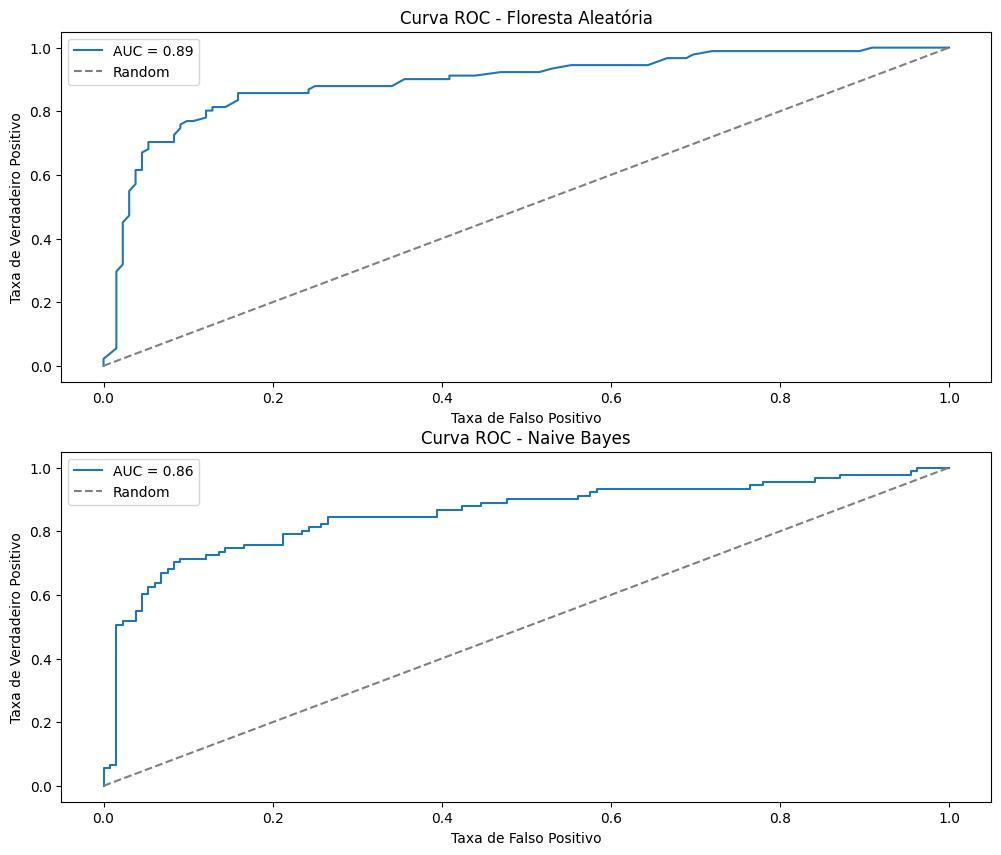

In [30]:
# plotando a curva ROC

fig, (ax1,ax2) = plt.subplots(2,figsize=(12,10))
ax1.plot(fpr_forest, tpr_forest, label=f'AUC = {auc_forest:.2f}')
ax1.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
ax1.set_title('Curva ROC - Floresta Aleatória')
ax1.set_xlabel('Taxa de Falso Positivo')
ax1.set_ylabel('Taxa de Verdadeiro Positivo')
ax1.legend()



ax2.plot(frp_gnb, tpr_gnb, label=f'AUC = {auc_gnb:.2f}')
ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
ax2.set_title('Curva ROC - Naive Bayes')
ax2.set_xlabel('Taxa de Falso Positivo')
ax2.set_ylabel('Taxa de Verdadeiro Positivo')
ax2.legend()


plt.show()

Agora vou realizar a analise das características importantes que a floresta aleatoria.

In [46]:
caracteristicas_importantes = model_forest.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns,'Importancia': caracteristicas_importantes })
features_df = features_df.sort_values(by='Importancia', ascending=False)
display(features_df)

,Feature,Importancia
6,IsFemale,0.225039
5,Fare,0.208188
0,PassengerId,0.195921
2,Age,0.181026
1,Pclass,0.077161
3,SibSp,0.046650
4,Parch,0.033567
7,Embarked Type,0.032447


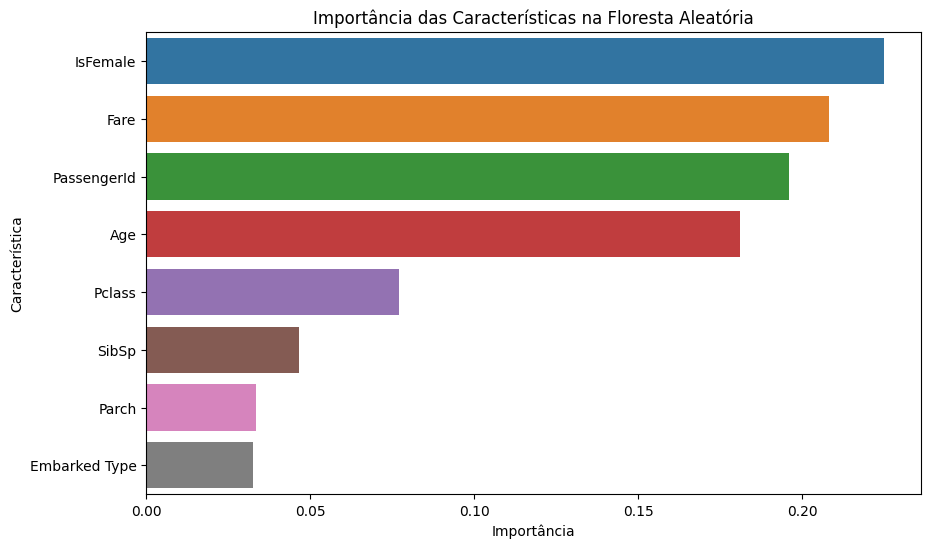

In [47]:
# Plotando a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=features_df)
plt.title('Importância das Características na Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

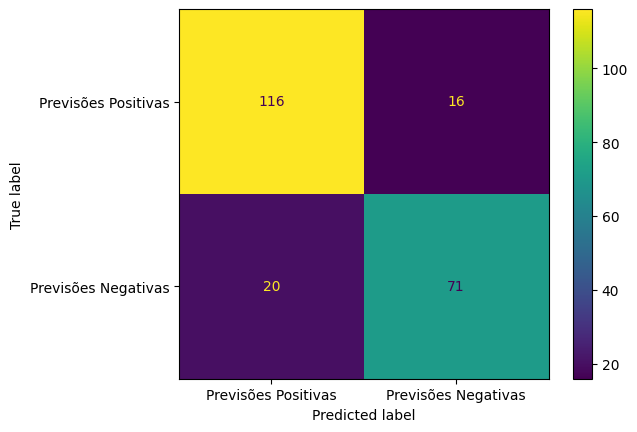

In [31]:
titulos = ['Previsões Positivas', 'Previsões Negativas']
ConfusionMatrixDisplay(confusion_forest, display_labels=titulos ).plot()
plt.show()

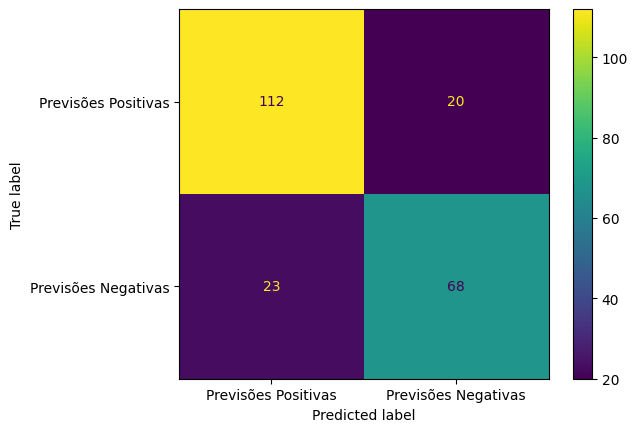

In [32]:
titulos = ['Previsões Positivas', 'Previsões Negativas']
ConfusionMatrixDisplay(confusion_naive, display_labels=titulos ).plot()
plt.show()

Após tudo a analise exploratoria e tratamento de dados o algoritmo de floresta aleatoria foi o que mais se adaptou melhor aos meus dados, por isso escolhi que usarei ele para prever a minha base de teste.

In [33]:
# Floresta Aleátoria
teste_forest = model_forest.predict(dados_teste)

# print(teste_forest)

Agora vou criar alguns graficos para visualizar melhor a proporção dos sobreviventes.


In [34]:
# Primeiro vou adicionar duas colunas na minha base de teste com os valores dos resultados do meu modelo

dados_teste['Sobreviventes Forest'] = teste_forest

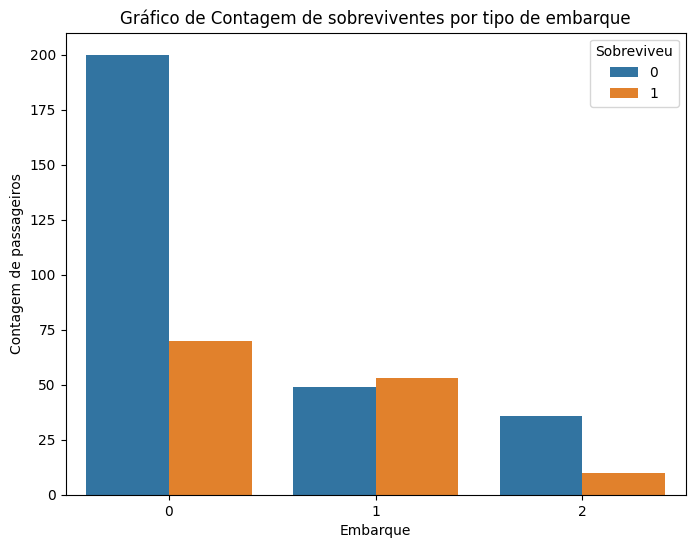

In [35]:
fig, ax1 = plt.subplots(1, figsize=(8,6))
sns.countplot(data=dados_teste,x='Embarked Type', hue='Sobreviventes Forest', ax=ax1)
ax1.set_title('Gráfico de Contagem de sobreviventes por embarque')
ax1.set_xlabel('Embarque')
ax1.set_ylabel('Contagem de passageiros')
ax1.legend(title='Sobreviveu')


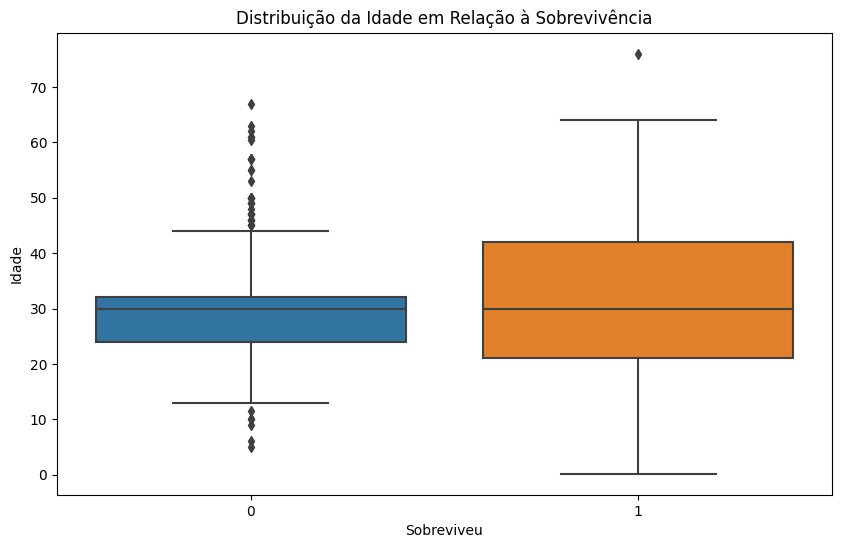

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sobreviventes Forest', y='Age', data=dados_teste)
plt.title('Distribuição da Idade em Relação à Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')
plt.show()


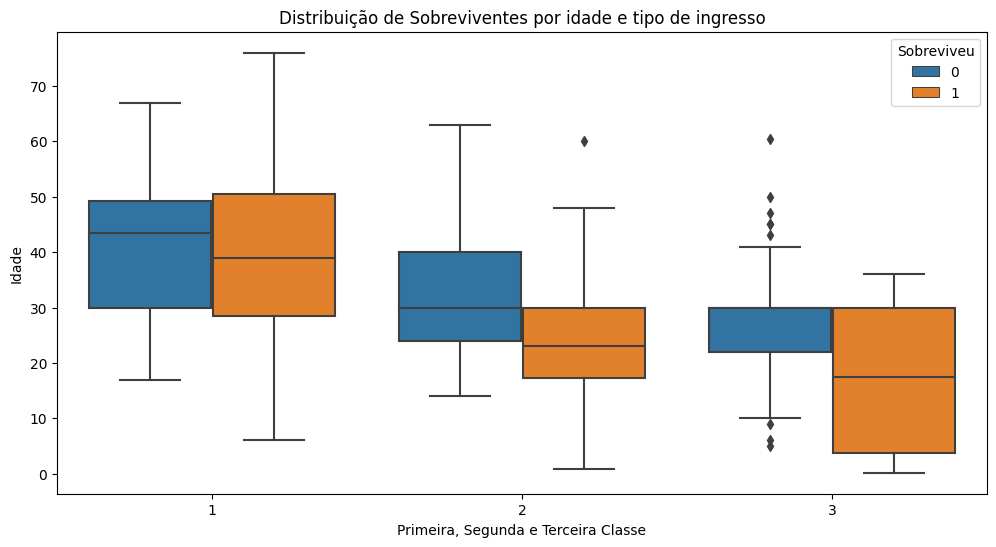

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age', hue='Sobreviventes Forest', data=dados_teste)
plt.title('Distribuição de Sobreviventes por idade e tipo de ingresso')
plt.xlabel('Primeira, Segunda e Terceira Classe')
plt.ylabel('Idade')
plt.legend(title='Sobreviveu')
plt.show()

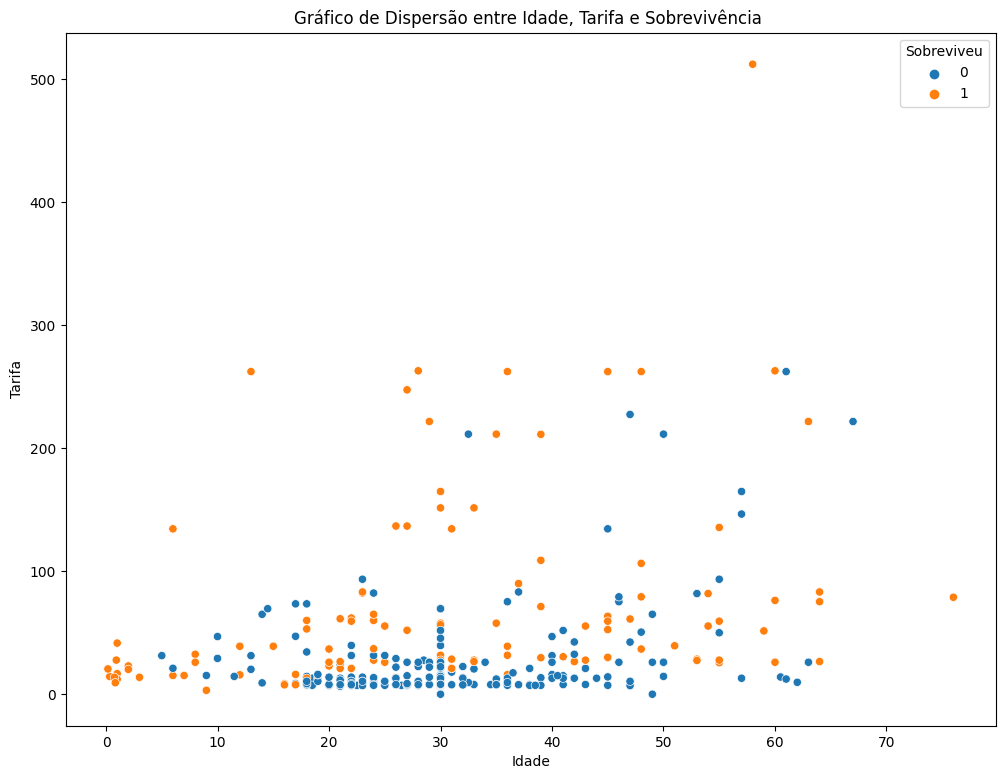

In [49]:
fig, ax1 = plt.subplots( figsize=(12, 9))

# Gráfico de Dispersão
sns.scatterplot(x='Age', y='Fare', hue='Sobreviventes Forest', data=dados_teste, ax=ax1)
ax1.set_title('Gráfico de Dispersão entre Idade, Tarifa e Sobrevivência ')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Tarifa')
ax1.legend(title='Sobreviveu')

plt.show()

Com isso eu finalizo meu projeto de aprendizado de máquina com uma precisão de 82%, um resultado até que satisfatorio. Futuramente pretendo otimizar mais meu projeto com outros algoritmos para verificar como eles se adaptam a meus dados e tentar alcançar uma precisão de uns 90% para cima.
Estou aberto a receber dicas ou sugestoões de diferentes abordagens ou otimizações.